<a href="https://colab.research.google.com/github/Varun-Mulchandani/Reddit-Flair-Classifier/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('reddit.csv')

In [3]:
data.head()

flair  ...                                                url
0  Scheduled  ...  https://www.telegraphindia.com/india/coronavir...
1  Scheduled  ...  https://twitter.com/ANI/status/123109390051893...
2  Scheduled  ...  https://twitter.com/ani/status/124073128907587...
3  Scheduled  ...  https://scroll.in/article/952687/why-the-supre...
4  Scheduled  ...  https://www.reddit.com/r/india/comments/fvcvo1...

[5 rows x 8 columns]

Here, I have tried to determine from the data if any particular author has a noticeable pattern where his/her posts come under a certain class.
Takeaway:
- Majority of authors have less than 5 posts.
- Those that have a lot of posts have posted under one flair more frequently than others..
- I have thus considered this as a viable attribute and included it in the input text(title) along with a seperator.

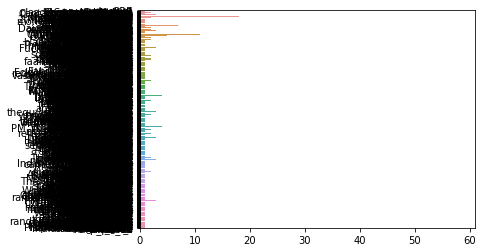

In [4]:
from collections import Counter
authors = list(data['author'])

x = list(Counter(authors).keys())
y = list(Counter(authors).values())

sns.barplot(y, x)

In [5]:
y_highest = list(y).index(max(list(y)))
x_highest = x[y_highest]
x_highest

'AutoModerator'

In [7]:
for i,j in zip(list(data['author']), list(data['flair'])):
  if i == 'AutoModerator':
    print(j)

Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Scheduled
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Photography
Business/Finance


The above example further proves the point that the feature 'author' is a viable attribute.

This is more evident with the scatterplot below.
Takeaway:
- Some authors have posts with only one or two flairs whereas others have posts with more flairs.

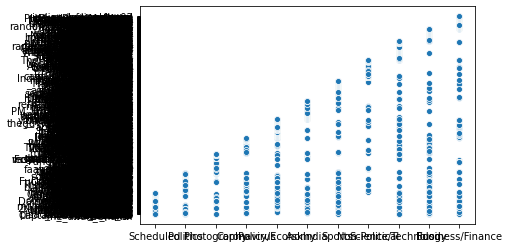

In [12]:
x = list(data['flair'])
y = list(data['author'])
sns.scatterplot(x, y);

Here, we see that posts with the flair politics has the highest number of points.

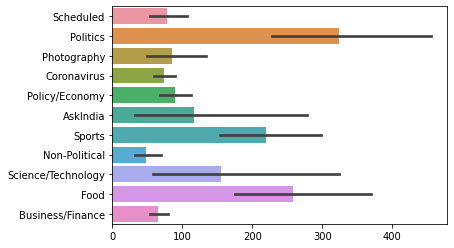

In [11]:
x = list(data['flair'])
y = list(data['score'])

sns.barplot(y, x);

Establishing the number of posts for each class in our dataset
Takeaway:
- All classes have approximately 200-250 submissions making this dataset a well balanced dataset. 

Text(0.5, 0, 'counts')

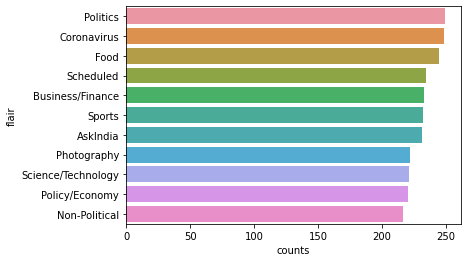

In [13]:
x = data.flair.value_counts()
sns.barplot(x, x.index)
plt.gca().set_ylabel('flair')
plt.gca().set_xlabel('counts')

To understand if there is a correlation between the number of characters in a post and its corresponding flair.
Takeaway:
- There is little to no correlation as different classes have similar distributions.

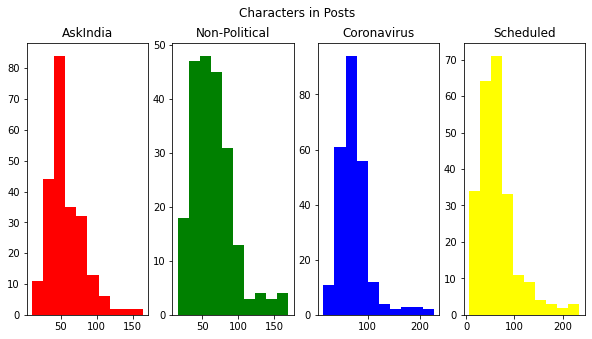

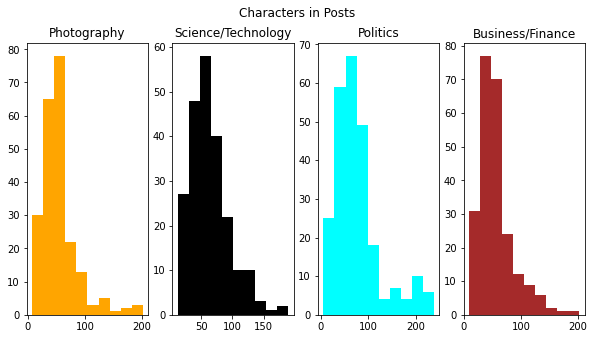

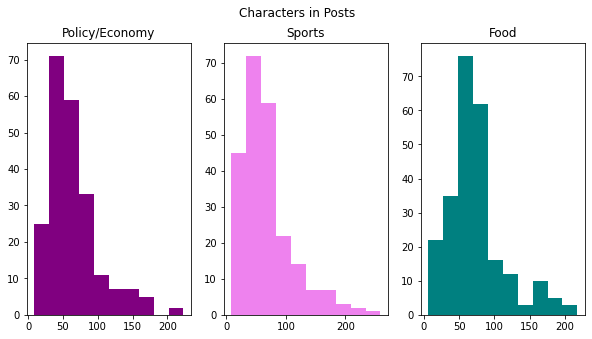

In [14]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(10,5))
data_len=data[data['flair']=='AskIndia']['title'].str.len()
ax1.hist(data_len,color='red')
ax1.set_title('AskIndia')
data_len=data[data['flair']=='Non-Political']['title'].str.len()
ax2.hist(data_len,color='green')
ax2.set_title('Non-Political')
data_len=data[data['flair']=='Coronavirus']['title'].str.len()
ax3.hist(data_len,color='blue')
ax3.set_title('Coronavirus')
data_len=data[data['flair']=='Scheduled']['title'].str.len()
ax4.hist(data_len,color='yellow')
ax4.set_title('Scheduled')
fig.suptitle('Characters in Posts')
plt.show()
fig,(ax5,ax6,ax7,ax8)=plt.subplots(1,4,figsize=(10,5))
data_len=data[data['flair']=='Photography']['title'].str.len()
ax5.hist(data_len,color='orange')
ax5.set_title('Photography')
data_len=data[data['flair']=='Science/Technology']['title'].str.len()
ax6.hist(data_len,color='black')
ax6.set_title('Science/Technology')
data_len=data[data['flair']=='Politics']['title'].str.len()
ax7.hist(data_len,color='cyan')
ax7.set_title('Politics')
data_len=data[data['flair']=='Business/Finance']['title'].str.len()
ax8.hist(data_len,color='brown')
ax8.set_title('Business/Finance')
fig.suptitle('Characters in Posts')
plt.show()
fig,(ax9,ax10,ax11)=plt.subplots(1,3,figsize=(10,5))
data_len=data[data['flair']=='Policy/Economy']['title'].str.len()
ax9.hist(data_len,color='purple')
ax9.set_title('Policy/Economy')
data_len=data[data['flair']=='Sports']['title'].str.len()
ax10.hist(data_len,color='violet')
ax10.set_title('Sports')
data_len=data[data['flair']=='Food']['title'].str.len()
ax11.hist(data_len,color='teal')
ax11.set_title('Food')
fig.suptitle('Characters in Posts')
plt.show()


Here, we try to get a sense of the top 100 most common words occuring in posts of the 12 different classes

In [0]:
from wordcloud import WordCloud, STOPWORDS

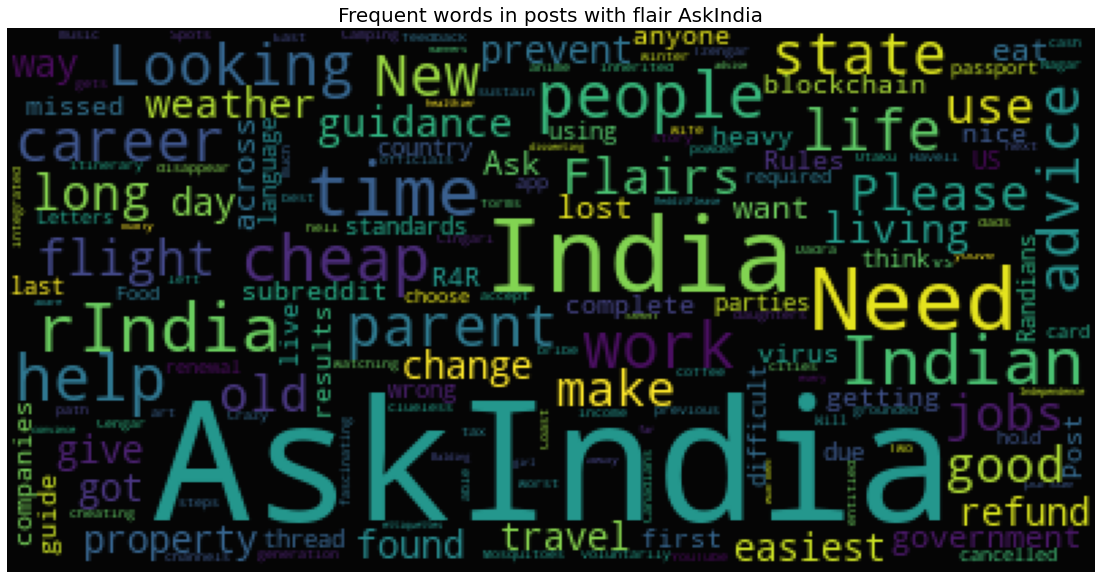

In [16]:
rnd_comments = data[data['flair'] == 'AskIndia'].sample(n=100)['title'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['one']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in posts with flair AskIndia", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

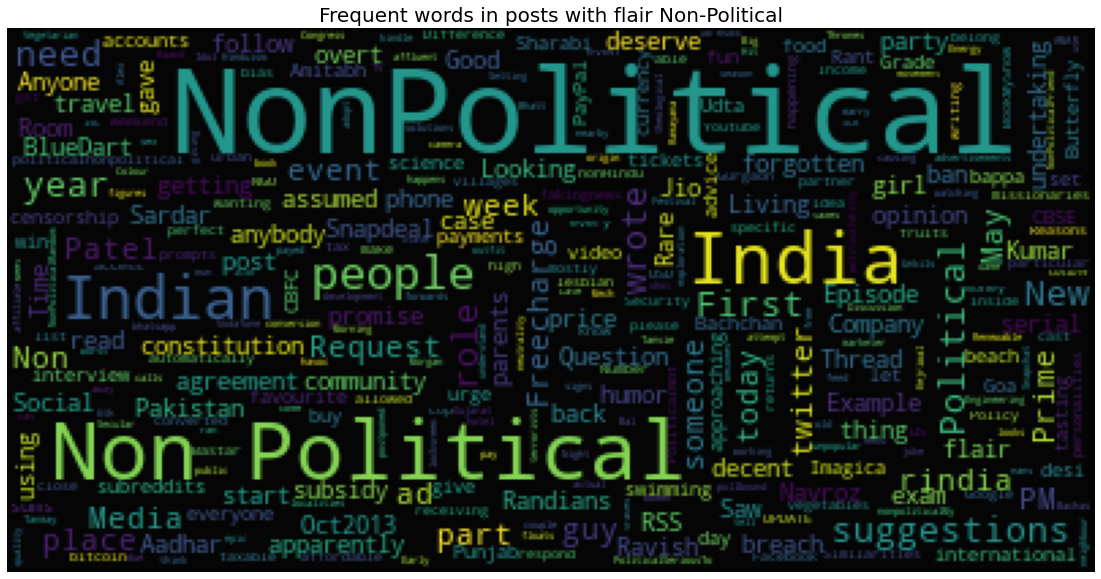

In [17]:
rnd_comments = data[data['flair'] == 'Non-Political'].sample(n=100)['title'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['one']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in posts with flair Non-Political", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

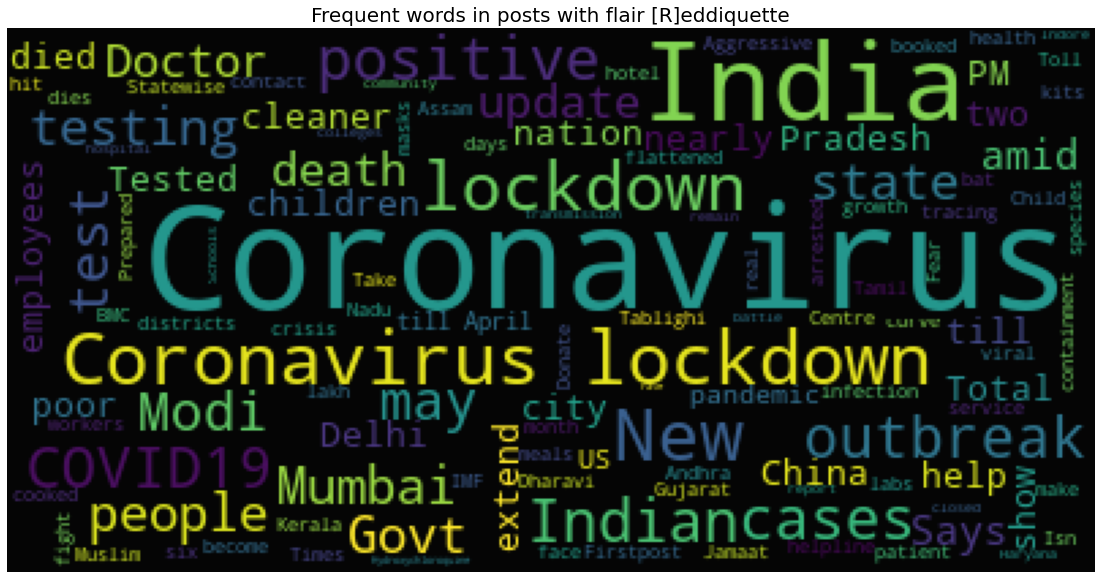

In [18]:
rnd_comments = data[data['flair'] == 'Coronavirus'].sample(n=100)['title'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['one']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in posts with flair [R]eddiquette", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

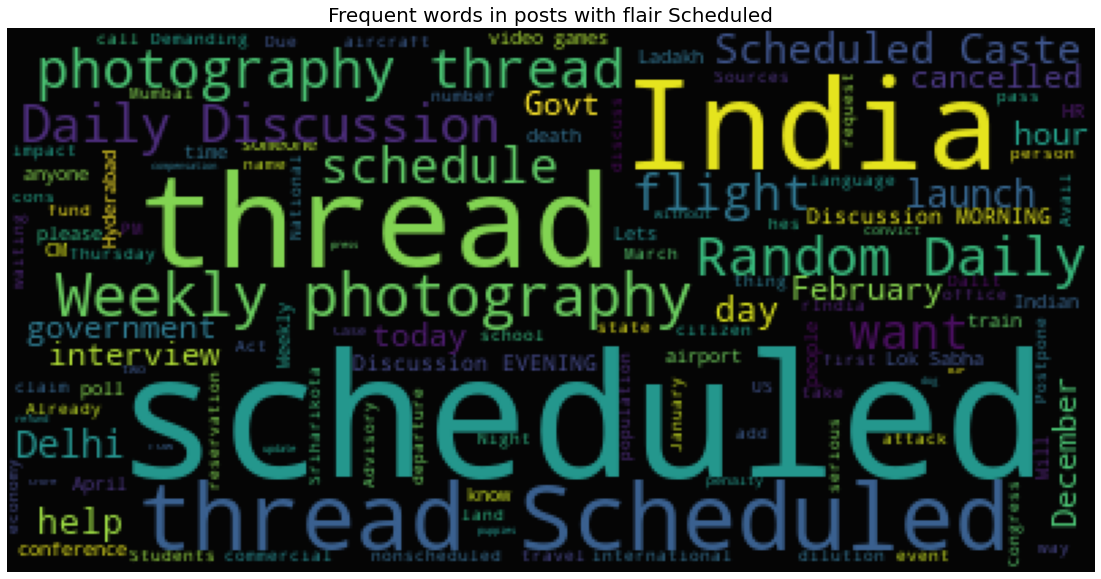

In [19]:
rnd_comments = data[data['flair'] == 'Scheduled'].sample(n=100)['title'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['one']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in posts with flair Scheduled", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

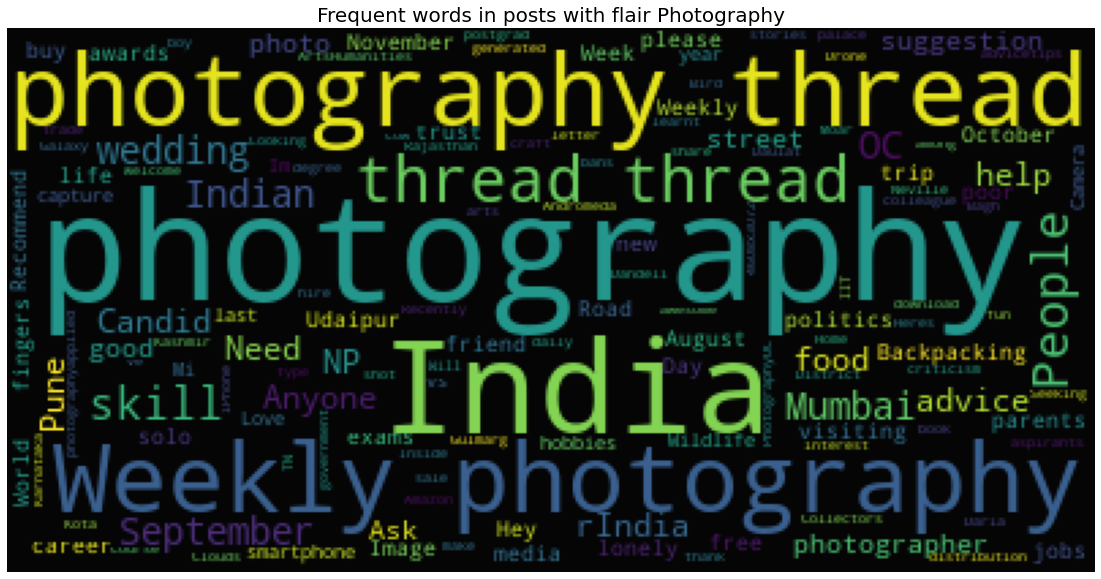

In [20]:
rnd_comments = data[data['flair'] == 'Photography'].sample(n=100)['title'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['one']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in posts with flair Photography", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

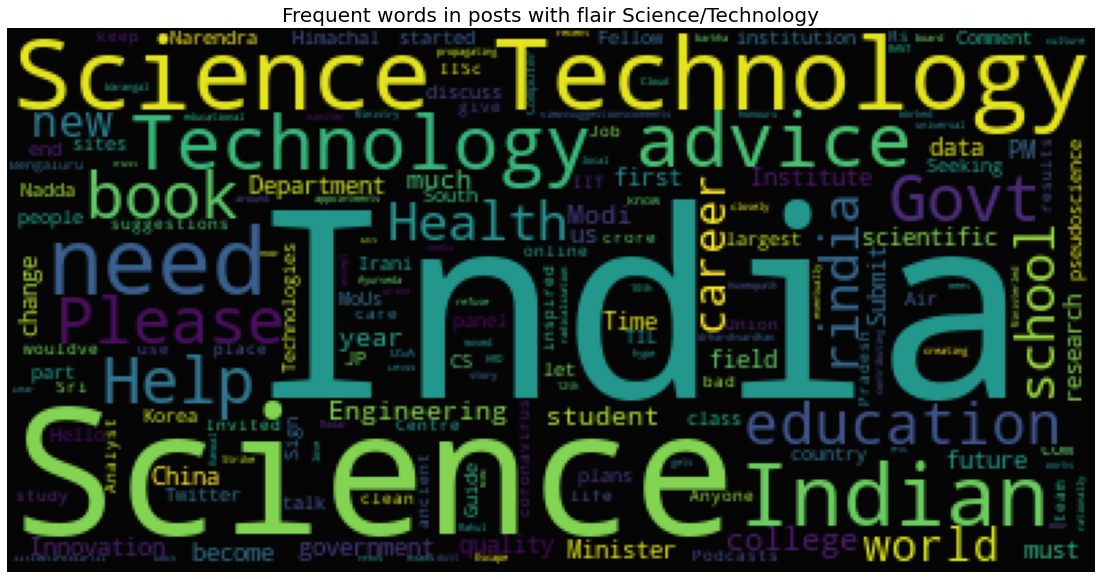

In [21]:
rnd_comments = data[data['flair'] == 'Science/Technology'].sample(n=100)['title'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['one']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in posts with flair Science/Technology", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

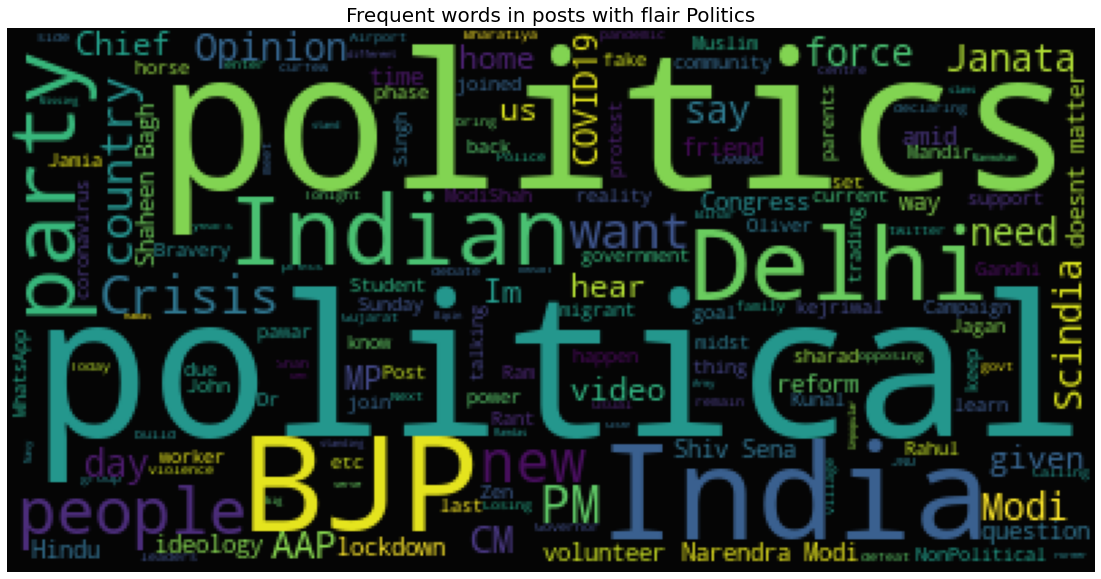

In [22]:
rnd_comments = data[data['flair'] == 'Politics'].sample(n=100)['title'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['one']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in posts with flair Politics", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

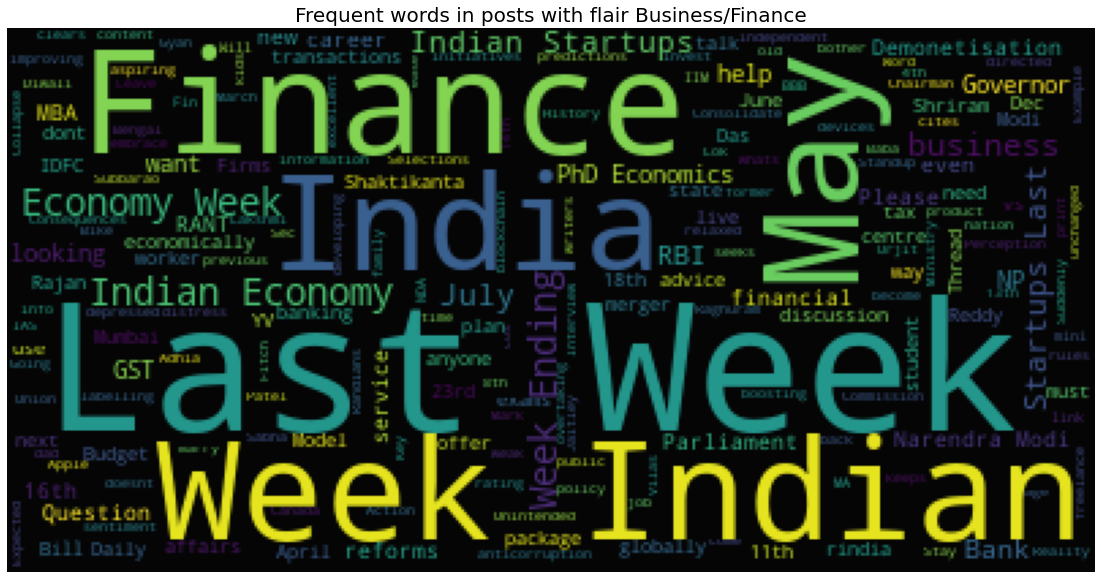

In [23]:
rnd_comments = data[data['flair'] == 'Business/Finance'].sample(n=100)['title'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['one']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in posts with flair Business/Finance", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

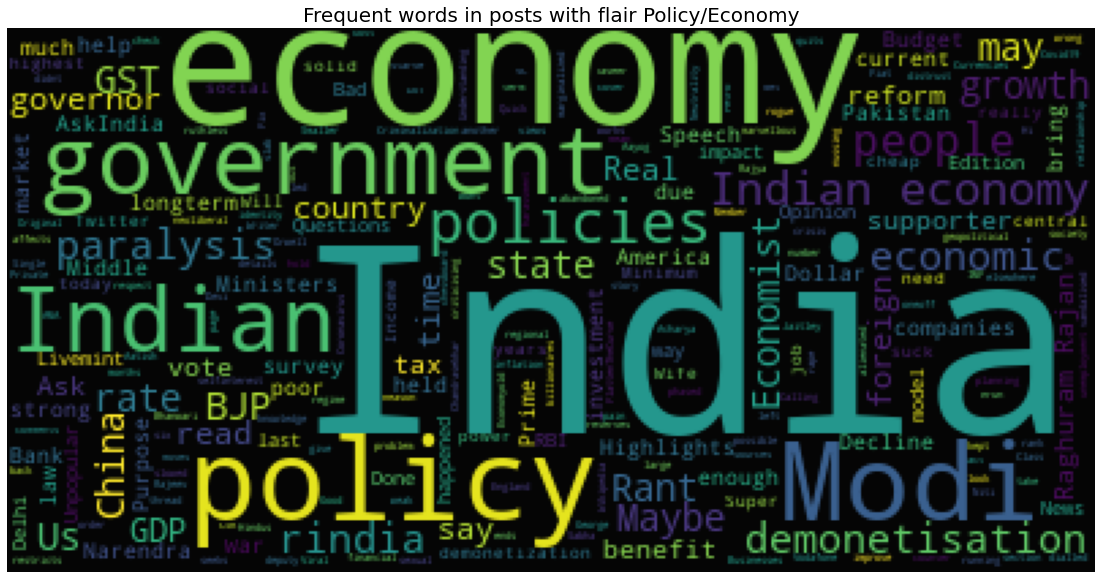

In [24]:
rnd_comments = data[data['flair'] == 'Policy/Economy'].sample(n=100)['title'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['one']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in posts with flair Policy/Economy", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

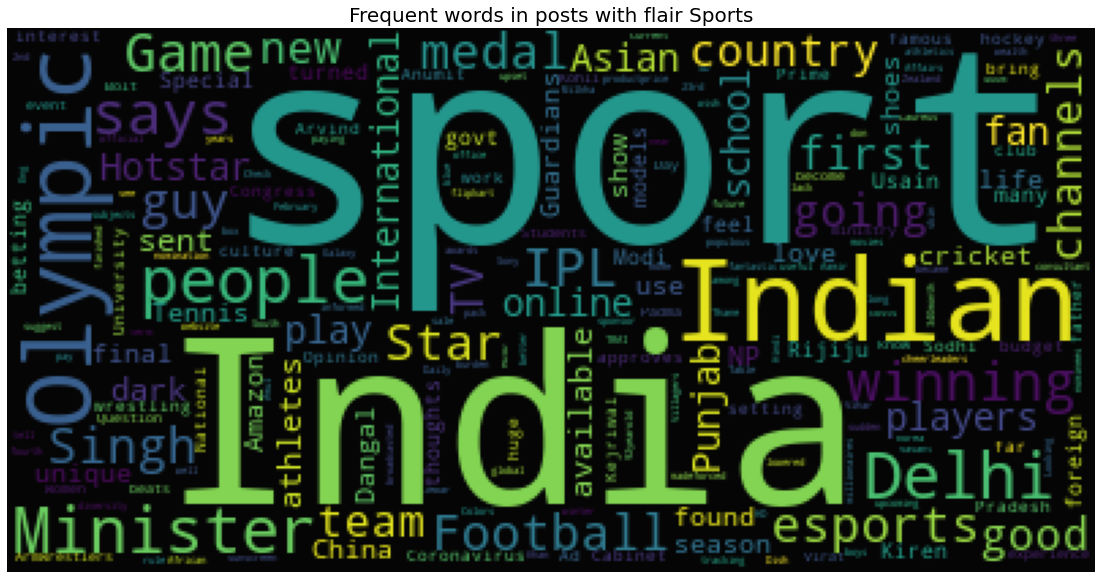

In [25]:
rnd_comments = data[data['flair'] == 'Sports'].sample(n=100)['title'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['one']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in posts with flair Sports", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

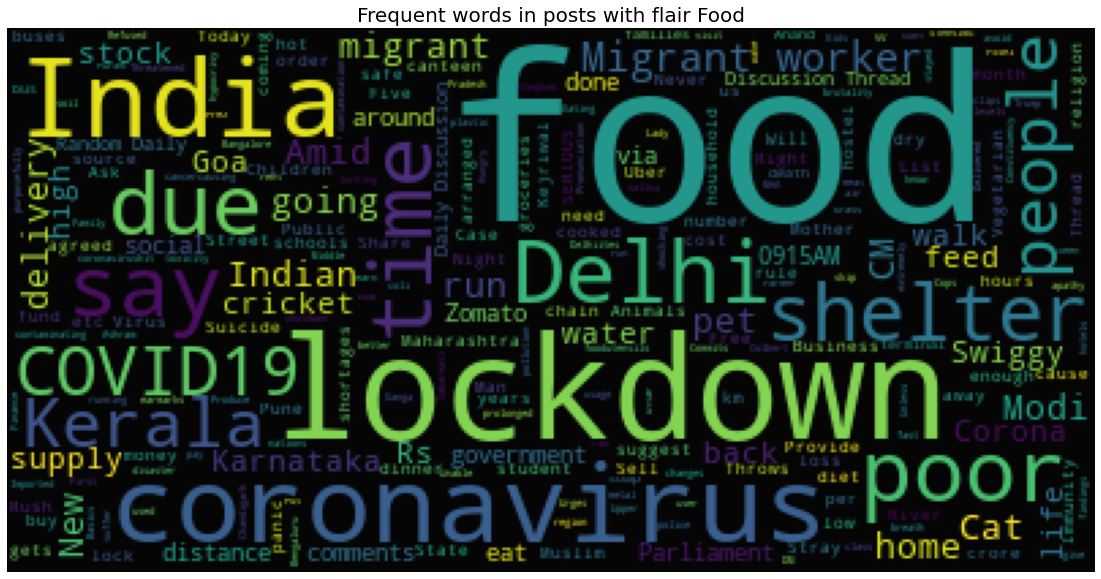

In [26]:
rnd_comments = data[data['flair'] == 'Food'].sample(n=100)['title'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['one']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in posts with flair Food", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()